# OPTIMIZACIÓN DEL PROCESO DE AGRUPAMIENTO DE OPEC MEDIANTE EL USO DE MACHINE LEARNING PARA LA PROVISIÓN DE EMPLEOS PÚBLICOS EN COLOMBIA
#### Edwin Cardenas, Andrés Gómez y Brayam Pineda

#### Justificación

La Comisión Nacional del Servicio Civil (CNSC), La Escuela Superior de Administración Pública (ESAP), la Universidad Nacional de Colombia (UNAL) y las entidades de régimen especial de carrera, son entidades avaladas para desarrollar los concursos de mérito para la provisión de vacantes definitivas de empleos públicos, concursos en los cuales se suelen ofrecer miles de vacantes. Dichos concursos surten varias etapas en pro de la selección de los aspirantes. Uno de estos consiste en qué, previo a las pruebas de conocimiento, puedan agruparse aquellas Ofertas Públicas de Empleo (OPEC) de acuerdo con sus similitud en los requisitos y funciones, con el fin de aplicar el mismo test a los aspirantes y puedan así disminuirse los gastos implicados.

##### No obstante...

Este proceso de agrupamiento, es un proceso manual, repetitivo y el cual depende del criterio de los funcionarios. Adicionalmente, si se modifica una etapa previa a este, el mismo debe ser nuevamente realizado. Debido a las características mencionadas el objetivo de este trabajo es proponer una herramienta basada en Procesamiento de Lenguaje Natural y Aprendizaje Automatizado que logre disminuir el esfuerzo humano y abordar el problema desde un criterio objetivo, operacionalizable y replicable. En este sentido, se desarrolló un modelo de vectorización de las OPEC mediante Term Frequency - Inverse Document Frequency (TF-IDF). Posteriormente, se utilizó el algoritmo k-means para agrupar los empleos con el fin de cumplir con los objetivos normativos respecto al criterio de mismos empleos. Finalmente, se grafican los resultados obtenidos con el fin de comparar los clusters obtenidos. 
















In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from unidecode import unidecode
import spacy
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
stopwords_sp = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

import urllib.request
from bs4 import BeautifulSoup
import requests
from requests import get
from matplotlib import pyplot
from datetime import datetime
from wordcloud import WordCloud, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [2]:
Base = pd.read_excel('SUPERVISADO.xlsx',header=0)
Base.head()

Entidad  OPEC   nivel  \
0     Alcaldía de  Guachene   785  Asesor   
1  Gobernación de  Casanare   788  Asesor   
2  Gobernación de  Casanare   789  Asesor   
3  Gobernación de  Casanare   790  Asesor   
4  Gobernación de  Casanare   791  Asesor   

                         req_estudio_req_experiencia  \
0  Estudio: Título profesional en disciplina acad...   
1  Estudio: Título de formación profesional en nú...   
2  Estudio: Título profesional en núcleo básico d...   
3  Estudio: Título de formación profesional en di...   
4  Estudio: Título de Formación  Profesional en n...   

                                           proposito  \
0  Dirigir la formulación y ejecución de planes, ...   
1  Asesorar a la Secretaría de Agricultura, Ganad...   
2  Asesorar al Secretario de Hacienda en temas re...   
3  Asesorar los planes, programas y proyectos de ...   
4  Asesorar los procesos Administrativos y  Finan...   

                                           funciones Agrupamiento    siep  \
0  1. Asesorar al alcalde, a las dependencias del...         S006  2375.0   
1  1. Asesorar en la elaboración de los estudios ...         S004  2612.0   
2  1. Asesorar a la Secretaría de Hacienda, en te...         S002  2368.0   
3  1. Asesorar a la Secretaría de Salud en el ámb...         S003  2366.0   
4  1. Asesorar al Despacho del Secretario de Salu...         S001  2365.0   

  Municipio  Departamento      Pais          ubicación  
0  GUACHENÉ         CAUCA  Colombia  GUACHENÉ Colombia  
1     YOPAL      CASANARE  Colombia     YOPAL Colombia  
2     YOPAL      CASANARE  Colombia     YOPAL Colombia  
3     YOPAL      CASANARE  Colombia     YOPAL Colombia  
4     YOPAL      CASANARE  Colombia     YOPAL Colombia

In [3]:
def graficar_nivel(dataframe):
    filtro = input("El nivel a filtrar es ")
    print("")
    dataframe = dataframe[dataframe["nivel"] == filtro]
    
    D = dataframe[['Entidad', 'OPEC','nivel','Agrupamiento','siep']]
    D['E'] = D.loc[:, 'Entidad'].replace(D.loc[:, 'Entidad'].unique(), range(len(D.loc[:, 'Entidad'].unique())))
    D['O'] = D.loc[:, 'OPEC'].replace(D.loc[:, 'OPEC'].unique(), range(len(D.loc[:, 'OPEC'].unique())))
    D['N'] = D['nivel'].replace(D['nivel'].unique(), range(len(D['nivel'].unique())))
    D['A'] = D['Agrupamiento'].replace(D['Agrupamiento'].unique(), range(len(D['Agrupamiento'].unique())))
    D['S'] = D['siep'].replace(D['siep'].unique(), range(len(D['siep'].unique())))
    D = D[['O','A','S']]
    
    fig = px.parallel_coordinates(D, color='A', labels={
                "O": "OPEC", "A": "Agrupamiento", "S": "SIEP", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
    
    print(f"{len(Base.Entidad.unique())} entidades ofertaron {len(D.O.unique())} empleos para el nivel de {dataframe['nivel'].unique()[0]}, agrupados manualmente en {len(D.A.unique())} grupos y posterior a una nueva revisión  se convirtieron en {len(D.S.unique())} agrupamientos.")
    
    fig.show()

In [4]:
graficar_nivel(Base)

El nivel a filtrar es Profesional

171 entidades ofertaron 1947 empleos para el nivel de Profesional, agrupados manualmente en 82 grupos y posterior a una nueva revisión  se convirtieron en 434 agrupamientos.


In [5]:
pages = np.arange(0, 490, 70)
paginas = []
Soup = []
resu = []
y = []
print("cantidad original de paginas",len(paginas))
for i in pages:
    paginas.append("https://www.cnsc.gov.co/index.php/autos-de-cumplimiento-436-de-2017-servicio-nacional-de-aprendizaje-sena?start=" + str(i))
    print("cantidad final de paginas =", len(paginas))
print("cantidad original en y", len(y))
for z in paginas:
    req = urllib.request.Request(z,headers={'User-Agent':'Mozilla/5.0'})
    wp = urllib.request.urlopen(req)
    source = wp.read()
    wp.close()
    sp = BeautifulSoup(source,'html.parser')
    for x in sp.find_all("div", class_="pd-fdesc"):
        y.append(str(x.text))
    print("cantidad final en y", len(y))
for a in range(len(y)):
    try:
        day = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(1)
        month = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(2)
        year = re.search(r'(\d\d)-(\d\d)-(\d\d\d\d)', y[a]).group(3)
        res = day +'-'+ month + '-' + year
    except:
        pass
    resu.append(res)
len(resu)
resu = [i for i in resu if i != '00-18-2020']
len(resu)

cantidad original de paginas 0
cantidad final de paginas = 1
cantidad final de paginas = 2
cantidad final de paginas = 3
cantidad final de paginas = 4
cantidad final de paginas = 5
cantidad final de paginas = 6
cantidad final de paginas = 7
cantidad original en y 0
cantidad final en y 70
cantidad final en y 140
cantidad final en y 208
cantidad final en y 278
cantidad final en y 348
cantidad final en y 418
cantidad final en y 421


418

In [39]:
fecha = []
for i in resu:
    ej = datetime.strptime(i,'%d-%m-%Y')
    fecha.append(ej) 
temp = pd.DataFrame(fecha).value_counts()
temp
df = temp.rename_axis('Mes').reset_index(name = 'Frecuencia')
df = df.sort_values(by=["Mes"])
df["Fecha"] = df["Mes"].dt.strftime("%Y-%m")
df

Mes  Frecuencia    Fecha
2  2018-04-13          34  2018-04
0  2019-08-21         195  2019-08
46 2019-09-10           1  2019-09
47 2019-09-25           1  2019-09
48 2019-10-16           1  2019-10
..        ...         ...      ...
40 2021-05-13           1  2021-05
14 2021-05-14           3  2021-05
22 2021-05-18           2  2021-05
41 2021-05-19           1  2021-05
67 2021-05-24           1  2021-05

[68 rows x 3 columns]

[Muro de los lamentos](https://www.cnsc.gov.co/index.php/autos-de-cumplimiento-436-de-2017-servicio-nacional-de-aprendizaje-sena)

<img src = "Sin título.png" alt = "Muro de los lamentos" >

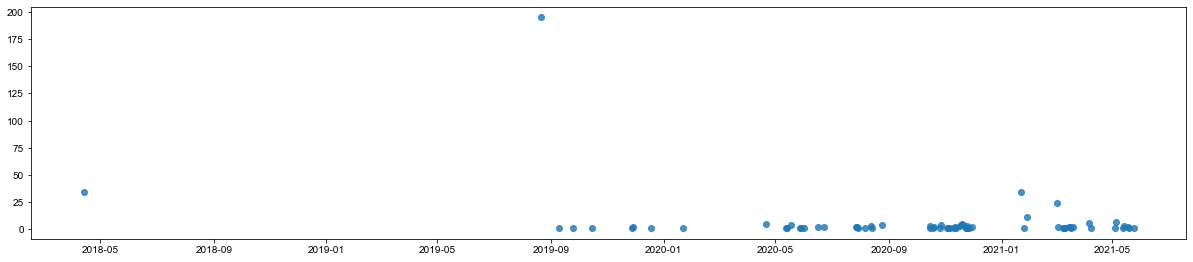

In [7]:
try:
    a4_dims = (20.7, 4.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.set_theme(style="darkgrid")
    sns.regplot(x=df.Mes, y=df.Frecuencia,data=df);
except TypeError:
    pass

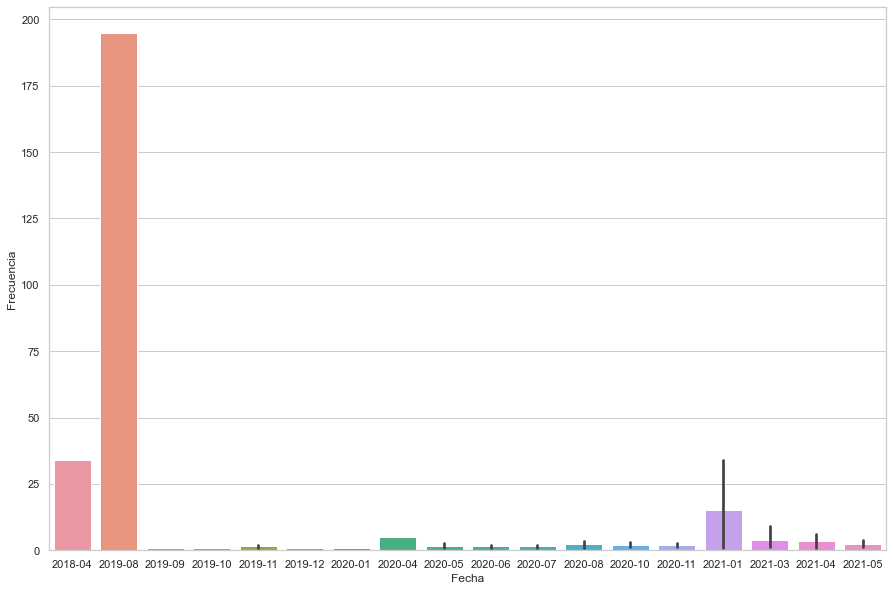

In [40]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Fecha", y="Frecuencia", data=df)

##### EMPLEO EQUIVALENTE.
Se entenderá por empleos equivalentes aquellos que pertenezcan al mismo nivel jerárquico, tengan grado salarial igual, posean el mismo requisito de experiencia, sean
iguales o similares en cuanto al propósito principal o funciones, requisitos de estudios y competencias comportamentales y mismo grupo de referencia3 de los empleos de las listas
de elegibles.

Mismo Grupo de Referencia o Normativo: Grupo al que se aplica el mismo cuadernillo y se califica agrupado. Por lo tanto, es un agregado estadístico que será empleado para obtener la calificación estandarizada (usualmente basada en el cálculo
de la media y desviación típica).

In [9]:
# longitud de terminos en el corpus de cada criterio
temp= []

for i in Base['req_estudio_req_experiencia']:
    temp.append(len (i.split()))

Base['reqcount']=temp

temp1= []

for i in Base['proposito']:
    temp1.append(len (i.split()))

Base['prop_clcount']=temp1

temp2= []

for i in Base['funciones']:
    temp2.append(len (i.split()))

Base['fx_clcount']=temp2
Base

Entidad    OPEC        nivel  \
0        Alcaldía de  Guachene     785       Asesor   
1     Gobernación de  Casanare     788       Asesor   
2     Gobernación de  Casanare     789       Asesor   
3     Gobernación de  Casanare     790       Asesor   
4     Gobernación de  Casanare     791       Asesor   
...                        ...     ...          ...   
4138     Gobernación de  Cauca  110944  Profesional   
4139     Gobernación de  Cauca  111001  Asistencial   
4140     Gobernación de  Cauca  111006  Asistencial   
4141    Alcaldía de San Marcos  112643      Tecnico   
4142  Gobernación de  Casanare  112909  Asistencial   

                            req_estudio_req_experiencia  \
0     Estudio: Título profesional en disciplina acad...   
1     Estudio: Título de formación profesional en nú...   
2     Estudio: Título profesional en núcleo básico d...   
3     Estudio: Título de formación profesional en di...   
4     Estudio: Título de Formación  Profesional en n...   
...                                                 ...   
4138  Estudio: Título profesional en disciplina acad...   
4139  Estudio: Titulo de bachiller en cualquier moda...   
4140  Estudio: Titulo de bachiller en cualquier moda...   
4141  Estudio: Terminación y aprobación de tres (3) ...   
4142  Estudio: Diploma de Bachiller  y curso de técn...   

                                              proposito  \
0     Dirigir la formulación y ejecución de planes, ...   
1     Asesorar a la Secretaría de Agricultura, Ganad...   
2     Asesorar al Secretario de Hacienda en temas re...   
3     Asesorar los planes, programas y proyectos de ...   
4     Asesorar los procesos Administrativos y  Finan...   
...                                                 ...   
4138  Agilizar y garantizar eficiencia en los proces...   
4139  Realizar actividades de apoyo a procesos admin...   
4140  Realizar actividades de apoyo a los procesos a...   
4141  Velar por el orden del flujo vehicular en las ...   
4142  Realizar labores de apoyo a los procesos del á...   

                                              funciones Agrupamiento    siep  \
0     1. Asesorar al alcalde, a las dependencias del...         S006  2375.0   
1     1. Asesorar en la elaboración de los estudios ...         S004  2612.0   
2     1. Asesorar a la Secretaría de Hacienda, en te...         S002  2368.0   
3     1. Asesorar a la Secretaría de Salud en el ámb...         S003  2366.0   
4     1. Asesorar al Despacho del Secretario de Salu...         S001  2365.0   
...                                                 ...          ...     ...   
4138  1. Realizar el proceso completo de contratació...         P004  2623.0   
4139  4. Atender y orientar al público personal y te...         A012  2211.0   
4140  1. Elaborar bases de datos que se requieran po...         A012  2211.0   
4141  1. Ejercer control y vigilancia en el cumplimi...         T041  2210.0   
4142  1. Apoyar la gestión documental del Fondo Depa...         A007  2219.0   

       Municipio  Departamento      Pais            ubicación  reqcount  \
0       GUACHENÉ         CAUCA  Colombia    GUACHENÉ Colombia        41   
1          YOPAL      CASANARE  Colombia       YOPAL Colombia        57   
2          YOPAL      CASANARE  Colombia       YOPAL Colombia        54   
3          YOPAL      CASANARE  Colombia       YOPAL Colombia        61   
4          YOPAL      CASANARE  Colombia       YOPAL Colombia        55   
...          ...           ...       ...                  ...       ...   
4138     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        42   
4139     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        13   
4140     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        13   
4141  SAN MARCOS         SUCRE  Colombia  SAN MARCOS Colombia        17   
4142       YOPAL      CASANARE  Colombia       YOPAL Colombia        17   

      prop_clcount  fx_clcount  
0               49         230  
1               

##### Preprocesado

In [10]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto= unidecode(texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto=nlp(str(texto))
    text=[]
    for token in texto:        
        text.append(token.lemma_)
    texto = " ".join(text)
    return texto 

In [11]:
%%time
#Limpieza y stopwords requisitos de estudio y experiencia
Base['req_cl']= Base['req_estudio_req_experiencia'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords proposito
Base['prop_cl']= Base['proposito'].apply(lambda val: pre_procesado(val))
#Limpieza y stopwords funciones 
Base['fx_cl']= Base['funciones'].apply(lambda val: pre_procesado(val))

Wall time: 17min 39s


In [12]:
Base['Contenido_cl']= Base['req_cl']+Base['prop_cl']+Base['fx_cl']
Base

Entidad    OPEC        nivel  \
0        Alcaldía de  Guachene     785       Asesor   
1     Gobernación de  Casanare     788       Asesor   
2     Gobernación de  Casanare     789       Asesor   
3     Gobernación de  Casanare     790       Asesor   
4     Gobernación de  Casanare     791       Asesor   
...                        ...     ...          ...   
4138     Gobernación de  Cauca  110944  Profesional   
4139     Gobernación de  Cauca  111001  Asistencial   
4140     Gobernación de  Cauca  111006  Asistencial   
4141    Alcaldía de San Marcos  112643      Tecnico   
4142  Gobernación de  Casanare  112909  Asistencial   

                            req_estudio_req_experiencia  \
0     Estudio: Título profesional en disciplina acad...   
1     Estudio: Título de formación profesional en nú...   
2     Estudio: Título profesional en núcleo básico d...   
3     Estudio: Título de formación profesional en di...   
4     Estudio: Título de Formación  Profesional en n...   
...                                                 ...   
4138  Estudio: Título profesional en disciplina acad...   
4139  Estudio: Titulo de bachiller en cualquier moda...   
4140  Estudio: Titulo de bachiller en cualquier moda...   
4141  Estudio: Terminación y aprobación de tres (3) ...   
4142  Estudio: Diploma de Bachiller  y curso de técn...   

                                              proposito  \
0     Dirigir la formulación y ejecución de planes, ...   
1     Asesorar a la Secretaría de Agricultura, Ganad...   
2     Asesorar al Secretario de Hacienda en temas re...   
3     Asesorar los planes, programas y proyectos de ...   
4     Asesorar los procesos Administrativos y  Finan...   
...                                                 ...   
4138  Agilizar y garantizar eficiencia en los proces...   
4139  Realizar actividades de apoyo a procesos admin...   
4140  Realizar actividades de apoyo a los procesos a...   
4141  Velar por el orden del flujo vehicular en las ...   
4142  Realizar labores de apoyo a los procesos del á...   

                                              funciones Agrupamiento    siep  \
0     1. Asesorar al alcalde, a las dependencias del...         S006  2375.0   
1     1. Asesorar en la elaboración de los estudios ...         S004  2612.0   
2     1. Asesorar a la Secretaría de Hacienda, en te...         S002  2368.0   
3     1. Asesorar a la Secretaría de Salud en el ámb...         S003  2366.0   
4     1. Asesorar al Despacho del Secretario de Salu...         S001  2365.0   
...                                                 ...          ...     ...   
4138  1. Realizar el proceso completo de contratació...         P004  2623.0   
4139  4. Atender y orientar al público personal y te...         A012  2211.0   
4140  1. Elaborar bases de datos que se requieran po...         A012  2211.0   
4141  1. Ejercer control y vigilancia en el cumplimi...         T041  2210.0   
4142  1. Apoyar la gestión documental del Fondo Depa...         A007  2219.0   

       Municipio  Departamento      Pais            ubicación  reqcount  \
0       GUACHENÉ         CAUCA  Colombia    GUACHENÉ Colombia        41   
1          YOPAL      CASANARE  Colombia       YOPAL Colombia        57   
2          YOPAL      CASANARE  Colombia       YOPAL Colombia        54   
3          YOPAL      CASANARE  Colombia       YOPAL Colombia        61   
4          YOPAL      CASANARE  Colombia       YOPAL Colombia        55   
...          ...           ...       ...                  ...       ...   
4138     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        42   
4139     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        13   
4140     POPAYÁN         CAUCA  Colombia     POPAYÁN Colombia        13   
4141  SAN MARCOS         SUCRE  Colombia  SAN MARCOS Colombia        17   
4142       YOPAL      CASANARE  Colombia       YOPAL Colombia        17   

      prop_clcount  fx_clcount  \
0               49         230   
1             

In [13]:
Asesor=Base[Base['nivel']=='Asesor']
Profesional=Base[Base['nivel']=='Profesional']
Tecnico=Base[Base['nivel']=='Tecnico']
Asistencial=Base[Base['nivel']=='Asistencial']

In [14]:
#RECOD para asesor
Asesor['N_A']=Asesor['Agrupamiento'].replace(Asesor['Agrupamiento'].unique(), range(len(Asesor['Agrupamiento'].unique())))
#RECOD para profesional
Profesional['N_A']=Profesional['Agrupamiento'].replace(Profesional['Agrupamiento'].unique(), range(len(Profesional['Agrupamiento'].unique())))
#RECOD para técnico
Tecnico['N_A']=Tecnico['Agrupamiento'].replace(Tecnico['Agrupamiento'].unique(), range(len(Tecnico['Agrupamiento'].unique())))
#RECOD para asistencial
Asistencial['N_A']=Asistencial['Agrupamiento'].replace(Asistencial['Agrupamiento'].unique(), range(len(Asistencial['Agrupamiento'].unique())))



In [15]:
#Asesor
sxtrain = Asesor.Contenido_cl
sytrain = Asesor.N_A
#Profesional
pxtrain = Profesional.Contenido_cl
pytrain = Profesional.N_A
#Tecnico
txtrain = Tecnico.Contenido_cl
tytrain = Tecnico.N_A
#Asistencial
axtrain = Asistencial.Contenido_cl
aytrain = Asistencial.N_A

In [16]:
%%time
#vectorización TF-IDF
tfidf_vectorizer = TfidfVectorizer()
#nivel asesor
stfidfv = TfidfVectorizer()
Asesor_con_cl_tfidf = stfidfv.fit_transform(sxtrain.values)
#nivel profesional
ptfidfv = TfidfVectorizer()
Profesional_con_cl_tfidf = ptfidfv.fit_transform(pxtrain.values)
#nivel técnico
ttfidfv = TfidfVectorizer()
Tecnico_con_cl_tfidf = ttfidfv.fit_transform(txtrain.values)
#nivel asistencial
atfidfv = TfidfVectorizer()
Asistencial_con_cl_tfidf = atfidfv.fit_transform(axtrain.values)

Wall time: 4.24 s


In [17]:
b=pd.read_excel('1083.xlsx',header=0)
b['fx_cl']=b['funciones'].apply(lambda val: pre_procesado(val))


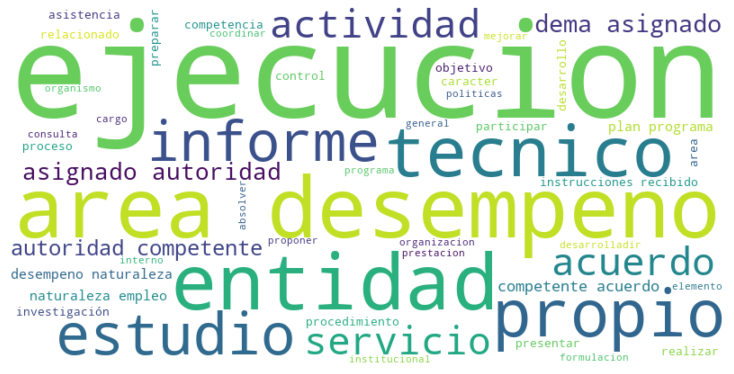

In [18]:
palabras = b.fx_cl.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=50,background_color="white",
                      stopwords=stopwords_sp, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [19]:
#LSA
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)
lsa = make_pipeline(svd)

#Asesor
slsa = make_pipeline(svd)
sxtrainlsa= slsa.fit_transform(Asesor_con_cl_tfidf)
#Profesional
plsa = make_pipeline(svd)
pxtrainlsa = plsa.fit_transform(Profesional_con_cl_tfidf)
#Tecnico
plsa = make_pipeline(svd)
txtrainlsa = plsa.fit_transform(Tecnico_con_cl_tfidf)
#Asistencial
alsa = make_pipeline(svd)
axtrainlsa = alsa.fit_transform(Asistencial_con_cl_tfidf)

In [20]:
results= pd.DataFrame(pxtrainlsa)
results.columns=['X','Y','Z']
results['cluster']=pytrain

trace = go.Scatter3d(x=results['X'].values,y=results['Y'].values, z=results['Z'].values, mode= 'markers', marker= dict(color=results['cluster'].values))

layout= go.Layout(title='LSA Empleos de nivel Profesional')

fig = go.Figure(data=trace, layout=layout)
iplot(fig)


## K-means

### Profesional

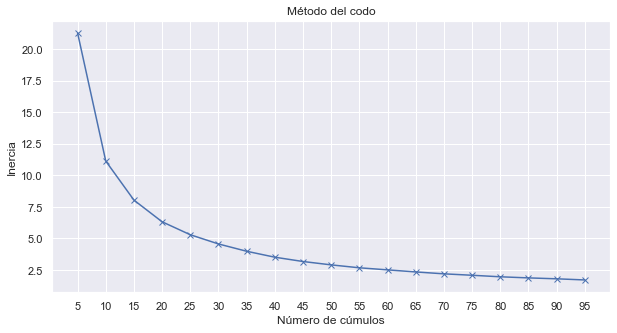

In [21]:
ks = []
kinertia = []
for k in range(5, 100, 5):
    kmeans = KMeans(n_clusters=k).fit(pxtrainlsa)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title('Método del codo')
plt.xticks(ks)
plt.plot(ks,kinertia, 'bx-');

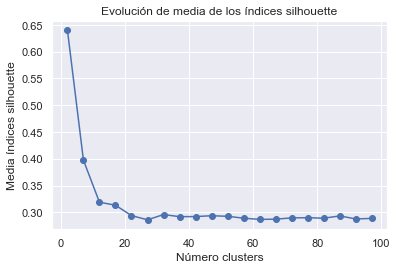

In [22]:
range_n_clusters = range(2, 100, 5)
valores_medios_silhouette = []

for k in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = k, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(pxtrainlsa)
    silhouette_avg = silhouette_score(pxtrainlsa, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


In [23]:
tfidf_matrix= pd.DataFrame(Profesional_con_cl_tfidf.toarray(), columns= ptfidfv.get_feature_names())

In [24]:
k=20
model= KMeans(n_clusters=k).fit(tfidf_matrix)
pxtrain= pd.DataFrame(pxtrain)
pxtrain['cluster']=model.labels_
pxtrain

Contenido_cl  cluster
5     [ ' estudio ' , ' titulo ' , ' profesional ' ,...        6
6     [ ' estudio ' , ' titulo ' , ' profesional ' ,...        5
7     [ ' estudio ' , ' titulo ' , ' profesional ' ,...       18
8     [ ' estudio ' , ' titulo ' , ' profesional ' ,...        1
9     [ ' estudio ' , ' titulo ' , ' profesional ' ,...       15
...                                                 ...      ...
4134  [ ' estudio ' , ' titulo ' , ' profesional ' ,...        8
4135  [ ' estudio ' , ' titulo ' , ' profesional ' ,...       19
4136  [ ' estudio ' , ' titulo ' , ' profesional ' ,...        8
4137  [ ' estudio ' , ' titulo ' , ' profesional ' ,...        1
4138  [ ' estudio ' , ' titulo ' , ' profesional ' ,...        8

[1947 rows x 2 columns]

In [25]:
nbrs = NearestNeighbors(n_neighbors=3, metric='cosine').fit(pxtrainlsa)

clust_cnt = pxtrain.cluster.value_counts()
clust_cnt_pct = pxtrain.cluster.value_counts(normalize=True)

centroids = model.cluster_centers_

terms = ptfidfv.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print("")
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print("")
    print("")


Cluster # 0
Tiene 57 registros (2.93% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
contable financiero contabilidad contaduria informacion general nacion registro norma entidad publicar profesional procedimiento informe municipio establecido proceso libro elaborar presentar 

Cluster # 1
Tiene 120 registros (6.16% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juridico juridica judicial proceso administrativo derecho acto profesional vigente oficina proyectar contratacion secretaria asunto contractual ley concepto experiencia dependencia relacionado 

Cluster # 2
Tiene 26 registros (1.34% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
adscrito encontrar razon programa intervenir dependencia cargo eficacia entidad obtenido cumplir propio eficiencia prestacion procedimiento proyecto ejecucion interno plan logro 

Cluster # 3
Tiene 120 registros (6.16% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
familia violencia intrafamiliar adolescente medida nino derechos familiar menor delito caso derecho s

In [26]:
for i in range(k): print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


#  Si las metricas son malas normalizar
https://github.com/chrisjmccormick/LSA_Classification/blob/master/runClassification_LSA.py

### Técnico

In [27]:
results= pd.DataFrame(txtrainlsa)
results.columns=['X','Y','Z']
results['cluster']=tytrain

trace = go.Scatter3d(x=results['X'].values,y=results['Y'].values, z=results['Z'].values, mode= 'markers', marker= dict(color=results['cluster'].values))

layout= go.Layout(title='LSA Empleos de nivel Técnico')

fig = go.Figure(data=trace, layout=layout)
iplot(fig)


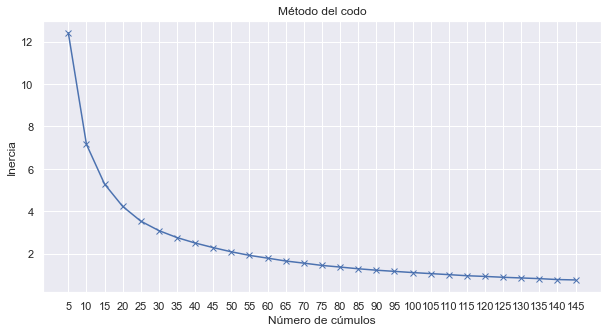

In [28]:
ks = []
kinertia = []
for k in range(5, 150, 5):
    kmeans = KMeans(n_clusters=k).fit(txtrainlsa)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title('Método del codo')
plt.xticks(ks)
plt.plot(ks,kinertia, 'bx-');

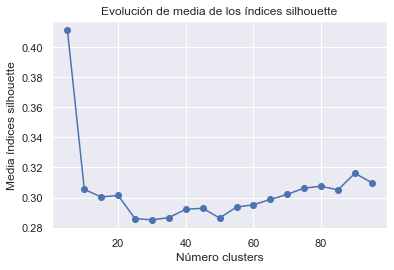

In [29]:
range_n_clusters = range(5, 100, 5)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(txtrainlsa)
    silhouette_avg = silhouette_score(txtrainlsa, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [30]:
tfidf_matrix= pd.DataFrame(Tecnico_con_cl_tfidf.toarray(), columns= ttfidfv.get_feature_names())
k=70
model= KMeans(n_clusters=k).fit(tfidf_matrix)
txtrain= pd.DataFrame(txtrain)
txtrain['cluster']=model.labels_
txtrain

Contenido_cl  cluster
562   [ ' estudio ' , ' titulo ' , ' bachiller ' , '...       32
563   [ ' estudio ' , ' titulo ' , ' formacion ' , '...       16
564   [ ' estudio ' , ' educacion ' , ' titulo ' , '...       15
565   [ ' estudio ' , ' educacion ' , ' titulo ' , '...       69
566   [ ' estudio ' , ' acreditar ' , ' titulo ' , '...       10
...                                                 ...      ...
4121  [ ' estudio ' , ' titulo ' , ' formacion ' , '...       50
4122  [ ' estudio ' , ' titulo ' , ' formacion ' , '...       50
4131  [ ' estudio ' , ' titulo ' , ' bachiller ' , '...        4
4132  [ ' estudio ' , ' titulo ' , ' bachiller ' , '...        4
4141  [ ' estudio ' , ' terminacion ' , ' aprobacion...       64

[1154 rows x 2 columns]

In [31]:
nbrs = NearestNeighbors(n_neighbors=3, metric='cosine').fit(txtrainlsa)

clust_cnt = txtrain.cluster.value_counts()
clust_cnt_pct = txtrain.cluster.value_counts(normalize=True)

centroids = model.cluster_centers_

terms = ttfidfv.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()

Cluster # 0
Tiene 25 registros (2.17% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
policia judicial convivencia contravenciones publico conocer codigo ley policiva diligencia pacifico proceso autoridad policivo derechos instancia primero norma competencia ciudadana 

Cluster # 1
Tiene 13 registros (1.13% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
instrucciones recibido acuerdo area informacion presentar tecnico proceso informe desarrollo disenar desarrollar reparar sistema sugerir periodico comprension desempeno instalar actividad 

Cluster # 2
Tiene 70 registros (6.07% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
informacion dependencia tecnico area funciones jefe sistema experiencia proceso cargo actividad realizar administrativo acuerdo relacionado documento asignado dema procedimiento apoyar 

Cluster # 3
Tiene 10 registros (0.87% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
nsito tr transporte veh accidente comparendo ser culo as norma seg poseer dem transito ndo rdén judicial acuer

art culo ley protecci blico reparaci polic decir instancia conocer restituci medida primero decreto dem bien nacional aplicaci convivencia demolici 

Cluster # 69
Tiene 25 registros (2.17% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
archivo documental gestion documento archivistico central nacion documentacion organizacion general tabla conservacion entidad retencion acuerdo administracion historico proceso transferencia procedimiento 



### Asistencial

In [32]:
results= pd.DataFrame(axtrainlsa)
results.columns=['X','Y','Z']
results['cluster']=aytrain
#results['texto']= strain.Contenidofx.apply(lambda val: val[:140])
trace = go.Scatter3d(x=results['X'].values,y=results['Y'].values, z=results['Z'].values, mode= 'markers', marker= dict(color=results['cluster'].values))

layout= go.Layout(title='LSA Empleos de Asistencial')

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

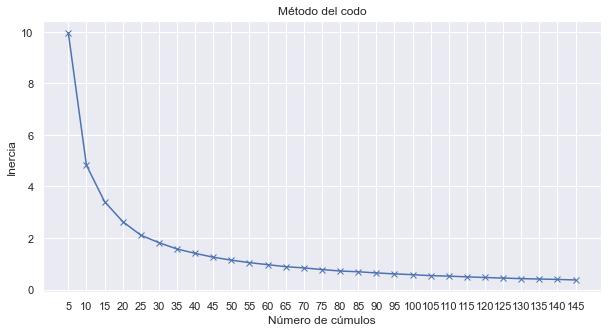

In [33]:
ks = []
kinertia = []
for k in range(5, 150, 5):
    kmeans = KMeans(n_clusters=k).fit(axtrainlsa)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title('Método del codo')
plt.xticks(ks)
plt.plot(ks,kinertia, 'bx-');

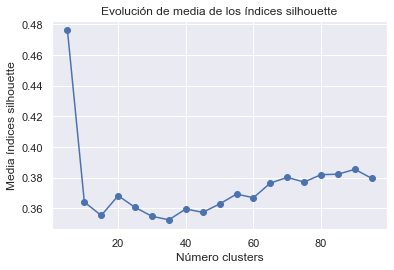

In [34]:
range_n_clusters = range(5, 100, 5)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(axtrainlsa)
    silhouette_avg = silhouette_score(axtrainlsa, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [35]:
nbrs = NearestNeighbors(n_neighbors=3, metric='cosine').fit(axtrainlsa)

clust_cnt = axtrain.cluster.value_counts()
clust_cnt_pct = axtrain.cluster.value_counts(normalize=True)

centroids = model.cluster_centers_

terms = ttfidfv.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()


AttributeError: 'Series' object has no attribute 'cluster'